In [1]:
# !pip install mtcnn
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch
import cv2, mmcv
# confirm mtcnn was installed correctly
from facenet_pytorch import MTCNN
from IPython import display
import numpy as np

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [3]:
mtcnn = MTCNN(
    image_size=160, margin=20, min_face_size=40,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [4]:
# filename = "./image-data/frame175.jpg"

# filename = "test.png"
image_dir = "/s3/bucket/kaggle_vijay/train_sample_videos/"
image_file = "avibnnhwhp.mp4"
# filename = "family2.jpg"
filename = image_dir + image_file
print(filename)

/s3/bucket/kaggle_vijay/train_sample_videos/avibnnhwhp.mp4


In [6]:
video = mmcv.VideoReader(filename)
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
print(type(frames[0]))

<class 'PIL.Image.Image'>


In [8]:
cropped_faces = []
count = 0
for k, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(k + 1), end='')
    
    # Detect faces
    boxes, p = mtcnn.detect(frame)
    for i in range(len(p)):
        if p[i] > 0.9:
            face_crop = frame.crop(boxes[i])
            print(type(face_crop))
            cropped_faces.append(face_crop)
            count += 1

    if count == 10:
        break
print('\nDone')

Tracking frame: 1<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Tracking frame: 2<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Tracking frame: 3<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Tracking frame: 4<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Tracking frame: 5<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>

Done


In [11]:
print(type(cropped_faces[0]))

<class 'PIL.Image.Image'>


In [13]:
ocv_image = np.array(cropped_faces[0]) 

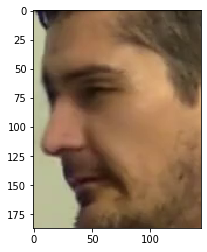

In [14]:
plt.imshow(ocv_image)

In [16]:
cv2.imwrite("cropped.png", ocv_image)

True

In [22]:
image = Image.open("cropped.png")
# convert to RGB, if needed
#image = image.convert('RGB')
# convert to array
rbi = np.asarray(image)

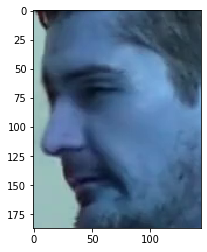

In [23]:
plt.imshow(rbi)

In [ ]:
results, x = mtcnn.detect(frames_tracked)

In [ ]:
face_img = frames_tracked[ny:ny+nr, nx:nx+nr]

In [ ]:
results[9][1]

In [ ]:
help(MTCNN)

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

In [ ]:
image_file = "/s3/bucket/demo_update/022920_005659/original/0163.png"

In [ ]:
# load image from file
image = Image.open(image_file)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)

# create the detector, using default weights
results, x = mtcnn.detect(frames)

In [ ]:
pixels.shape

In [ ]:
# go over the cropped images
for i,result in enumerate(results):
    
    dpi = 10
    x1, y1, width, height = result
    print("{} {} {} {}".format(x1, y1, width, height))
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1-20:y2+20, x1-20:x2+20]
    image = Image.fromarray(face)
#     image = image.resize((400, 400))
    face_array = np.asarray(image)
    
    height, width, depth = face_array.shape

    # What size does the figure need to be in inches to fit the image?
#     figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
#     fig = plt.figure(figsize=figsize)
    plt.subplot(len(results), 1, i+1)
    plt.axis('off')
    plt.imshow(face_array)
    print(y1,y2,x1,x2,"height : ",y2-y1,"width : ",x2-x1)

In [7]:
help(cv2)

Help on package cv2.cv2 in cv2:

NAME
    cv2.cv2 - Python wrapper for OpenCV.

PACKAGE CONTENTS
    cv2
    data (package)

CLASSES
    builtins.Exception(builtins.BaseException)
        cv2.error
    builtins.object
        cv2.Algorithm
            cv2.AlignExposures
                cv2.AlignMTB
            cv2.BackgroundSubtractor
                cv2.BackgroundSubtractorKNN
                cv2.BackgroundSubtractorMOG2
            cv2.BaseCascadeClassifier
            cv2.CLAHE
            cv2.CalibrateCRF
                cv2.CalibrateDebevec
                cv2.CalibrateRobertson
            cv2.DenseOpticalFlow
                cv2.DISOpticalFlow
                cv2.FarnebackOpticalFlow
                cv2.VariationalRefinement
            cv2.DescriptorMatcher
                cv2.BFMatcher
                cv2.FlannBasedMatcher
            cv2.GeneralizedHough
                cv2.GeneralizedHoughBallard
                cv2.GeneralizedHoughGuil
            cv2.LineSegmentDetector
  

In [ ]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
#     data = pyplot.imread(filename)
    # plot the image
#     pyplot.imshow(data)

    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')

    # get the context for drawing boxes
    face_array = np.asarray(image)
    
    height, width, depth = face_array.shape

    What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    
    plt.imshow(image)
    
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red',edgecolor="red", linewidth=7.5)
        # draw the box
        ax.add_patch(rect)
                # draw the dots on eyes nose ..
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()

In [ ]:
# display faces on the original image
draw_image_with_boxes(filename, results)

In [ ]:
# image = Image.open(filename)
# # convert to RGB, if needed
# image = image.convert('RGB')

# # 211 240 715 738
# im = Image.fromarray(pixels[211-20:240+20, 715-20:738+20])
# im.save('test.png')

# # face_array = np.asarray(im)

# # plt.imshow(face_array)

# im = Image.open("test.png")
# im.rotate(45).show()

In [ ]:
# plt.imshow(image)

In [ ]:
# !pip install opencv-python

In [ ]:
# # Importing all necessary libraries 
# import cv2 
# import os 
  
# # Read the video from specified path 
# cam = cv2.VideoCapture("aagfhgtpmv.mp4") 
  
# try: 
      
#     # creating a folder named data 
#     if not os.path.exists('image-data'): 
#         os.makedirs('image-data') 
  
# # if not created then raise error 
# except OSError: 
#     print ('Error: Creating directory of data') 
  
# # frame 
# currentframe = 0
  
# while(True): 
      
#     # reading from frame 
#     ret,frame = cam.read() 
  
#     if ret: 
#         # if video is still left continue creating images 
#         name = './data/frame' + str(currentframe) + '.jpg'
#         print ('Creating...' + name) 
  
#         # writing the extracted images 
#         cv2.imwrite(name, frame) 
  
#         # increasing counter so that it will 
#         # show how many frames are created 
#         currentframe += 1
#     else: 
#         break
  
# # Release all space and windows once done 
# cam.release() 
# cv2.destroyAllWindows() 


In [ ]:

# path ='./image-data'
# files = np.array(os.listdir(path))
# index = np.random.randint(0, len(files), size=1)
# print(files[index])

In [ ]:
# print(len(files))

In [ ]:
# def get_faces(filename):
    
#     # load image from file
#     image = Image.open(filename)
#     # convert to RGB, if needed
#     image = image.convert('RGB')
#     # convert to array
#     pixels = np.asarray(image)

#     # create the detector, using default weights
#     detector = mtcnn.MTCNN()
#     # detect faces in the image
#     results = detector.detect_faces(pixels)
#     draw_image_with_boxes(filename, results)
    

In [ ]:
# for i,f in enumerate(files[index]):
#     imagepath = "./image-data/"+f
#     print(imagepath)
#     plt.subplot(len(files), 1, i+1)
#     plt.axis('off')
#     get_faces(imagepath)

In [ ]:
# get_faces(imagepath)

In [ ]:
# import dlib
# import cv2

In [ ]:
# dnnFaceDetector = dlib.cnn_face_detection_model_v1("./models/mmod_human_face_detector.dat")
# face_detect = dlib.get_frontal_face_detector()


In [ ]:
# print(imagepath)

In [ ]:
# img = dlib.load_rgb_image("4people.png")

# rects = dnnFaceDetector(img, 3)
# 
# rects = face_detect(img,1)

In [ ]:
# for (i, rect) in enumerate(rects):
#     x1 = rect.rect.left()
#     y1 = rect.rect.top()
#     x2 = rect.rect.right()
#     y2 = rect.rect.bottom()
#     # Rectangle around the face
#     cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 3)
# plt.figure(figsize=(12,8))
# plt.imshow(img, cmap='gray')
# plt.show()

In [ ]:
# face_detect = dlib.get_frontal_face_detector()
# rects = face_detect(img, 3)
# for (i, rect) in enumerate(rects):
# (x, y, w, h) = face_utils.rect_to_bb(rect)
#     cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
# plt.figure(figsize=(12,8))
# plt.imshow(gray, cmap='gray')
# plt.show()